In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-yield-and-environmental-factors-2014-2023/crop_yield_dataset.csv


In [2]:
# ============================================================
# 🧠 Crop Yield Dataset - Kaggle Notebook Starter
# ============================================================

# 1️⃣ Import required libraries
import pandas as pd
import numpy as np

# 2️⃣ Define dataset path
file_path = "/kaggle/input/crop-yield-and-environmental-factors-2014-2023/crop_yield_dataset.csv"

# 3️⃣ Read the dataset
df = pd.read_csv(file_path)

# 4️⃣ Basic info about the dataset
print("✅ Dataset loaded successfully!")
print(f"Shape of dataset: {df.shape}")
print("\n📋 Columns in dataset:")
print(df.columns.tolist())

# 5️⃣ Display first 5 rows
print("\n🔍 Preview of the dataset:")
display(df.head())

# 6️⃣ Optional: Quick summary
print("\n📊 Dataset Summary:")
display(df.describe(include='all'))


✅ Dataset loaded successfully!
Shape of dataset: (36520, 12)

📋 Columns in dataset:
['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality']

🔍 Preview of the dataset:


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667



📊 Dataset Summary:


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
count,36520,36520,36520,36520.000000,36520.000000,36520.000000,36520.000000,36520.000000,36520.000000,36520.00000,36520.000000,36520.000000
unique,3652,10,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2023-12-31,Wheat,Saline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10,3652,7361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,6.602731,23.813996,74.256624,10.020153,66.011035,53.014006,42.01825,26.878480,37.516632
std,NaN,NaN,NaN,0.816973,8.920519,6.767587,2.998310,10.886721,8.812884,8.53781,25.740936,17.703171
min,NaN,NaN,NaN,5.500000,-3.540176,45.851089,-3.388906,45.000000,36.000000,27.00000,0.000000,13.291667
25%,NaN,NaN,NaN,6.250000,17.168542,69.745252,7.985872,58.500000,45.000000,35.00000,0.000000,22.500000
50%,NaN,NaN,NaN,6.500000,22.902987,77.097013,10.000299,65.000000,54.000000,42.00000,23.366344,35.583333
75%,NaN,NaN,NaN,6.750000,30.254748,80.000000,12.038546,71.500000,60.000000,49.50000,46.415729,49.291667


In [3]:
import pandas as pd 
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [4]:

df=df[df['Crop_Yield']!=0]
df

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667
5,2014-01-01,Cotton,Sandy,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,29.356115,39.375000
7,2014-01-01,Tomato,Clay,6.25,18.323272,80.000000,8.198084,60.0,45.0,40.0,22.221375,42.291667
...,...,...,...,...,...,...,...,...,...,...,...,...
36513,2023-12-31,Barley,Clay,6.25,11.617771,80.000000,14.700485,60.0,50.0,40.0,13.069169,43.750000
36515,2023-12-31,Cotton,Clay,6.25,19.538555,80.000000,3.666664,66.0,55.0,48.0,73.323885,49.291667
36516,2023-12-31,Sugarcane,Peaty,5.50,21.068336,78.931664,8.795036,71.5,54.0,42.0,39.226521,27.916667
36518,2023-12-31,Potato,Peaty,5.50,11.079561,80.000000,10.969366,60.5,45.0,31.5,6.067881,22.833333


In [5]:
df.drop(columns=['Crop_Type','Soil_Type'],inplace=True)

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [7]:
df=df.resample('D').mean()
df

,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
Date,,,,,,,,,
2014-01-01,6.250000,17.832341,79.992489,7.649061,61.285714,50.142857,40.142857,52.962570,41.714286
2014-01-02,6.928571,17.403738,79.997477,9.731096,67.285714,54.500000,43.785714,49.481053,31.964286
2014-01-03,6.250000,17.710699,78.611669,12.161914,60.785714,49.571429,40.142857,31.582386,40.601190
2014-01-04,7.125000,17.068594,79.349411,9.476664,69.375000,56.000000,44.937500,35.247034,38.703125
2014-01-05,6.375000,15.439732,80.000000,10.793227,68.062500,54.562500,43.125000,32.578187,48.994792
...,...,...,...,...,...,...,...,...,...
2023-12-27,6.406250,18.765488,79.418663,10.391741,63.687500,51.937500,41.125000,45.000561,27.786458
2023-12-28,6.583333,15.818711,79.517023,11.417404,66.000000,54.166667,42.833333,36.566595,41.680556
2023-12-29,6.843750,17.750068,79.094460,9.926405,66.062500,53.687500,42.375000,42.949637,39.281250


In [8]:
df = df.sort_index()
df

,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
Date,,,,,,,,,
2014-01-01,6.250000,17.832341,79.992489,7.649061,61.285714,50.142857,40.142857,52.962570,41.714286
2014-01-02,6.928571,17.403738,79.997477,9.731096,67.285714,54.500000,43.785714,49.481053,31.964286
2014-01-03,6.250000,17.710699,78.611669,12.161914,60.785714,49.571429,40.142857,31.582386,40.601190
2014-01-04,7.125000,17.068594,79.349411,9.476664,69.375000,56.000000,44.937500,35.247034,38.703125
2014-01-05,6.375000,15.439732,80.000000,10.793227,68.062500,54.562500,43.125000,32.578187,48.994792
...,...,...,...,...,...,...,...,...,...
2023-12-27,6.406250,18.765488,79.418663,10.391741,63.687500,51.937500,41.125000,45.000561,27.786458
2023-12-28,6.583333,15.818711,79.517023,11.417404,66.000000,54.166667,42.833333,36.566595,41.680556
2023-12-29,6.843750,17.750068,79.094460,9.926405,66.062500,53.687500,42.375000,42.949637,39.281250


In [9]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

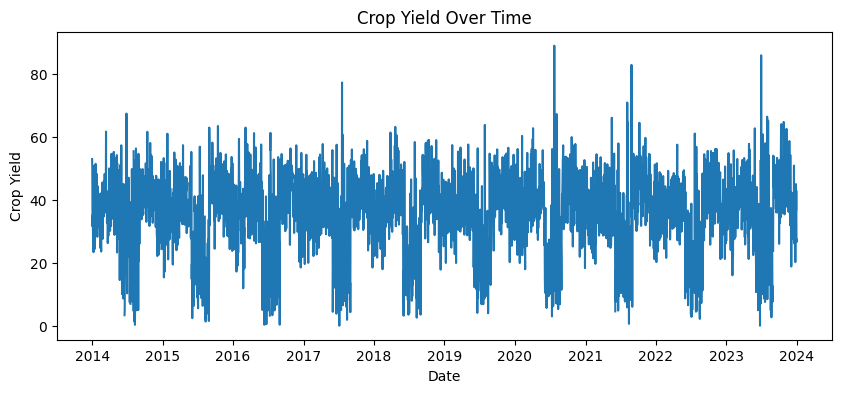

In [11]:
plt.figure(figsize=(10, 4))
plt.plot(df['Crop_Yield'])
plt.title("Crop Yield Over Time")
plt.xlabel("Date")
plt.ylabel("Crop Yield")
plt.show()

In [13]:
series=df['Crop_Yield']

In [14]:
cols=df.columns.tolist()
n=len(cols)

In [16]:
df.columns

Index(['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K',
       'Crop_Yield', 'Soil_Quality'],
      dtype='object')

In [17]:
def test_stationarity(series, col_name):
    print(f"\n--- Stationarity Test for: {col_name} ---\n")
    
    # 1. Plot the series
    plt.figure(figsize=(10,3))
    plt.plot(series)
    plt.title(f"{col_name} Time Series")
    plt.show()
    
    # 2. ACF & PACF plots
    plot_acf(series, lags=30)
    plt.title(f"ACF - {col_name}")
    plt.show()
    
    plot_pacf(series, lags=30)
    plt.title(f"PACF - {col_name}")
    plt.show()
    
    # 3. ADF Test
    adf_result = adfuller(series.dropna())
    print(adf_result)
    print(f"ADF Statistic: {adf_result[0]:.4f}")
    print(f"ADF p-value: {adf_result[1]:.4f}")
    if adf_result[1] < 0.05:
        print("Likely Stationary\n")
    else:
        print("Likely Non-Stationary\n")
    
    # 4. KPSS Test
    kpss_result = kpss(series.dropna(), nlags="auto")
    print(kpss_result)
    print(f"KPSS Statistic: {kpss_result[0]:.4f}")
    print(f"KPSS p-value: {kpss_result[1]:.4f}")
    if kpss_result[1] < 0.05:
        print("Likely Non-Stationary")
    else:
        print("Likely Stationary")


--- Stationarity Test for: Crop_Yield ---



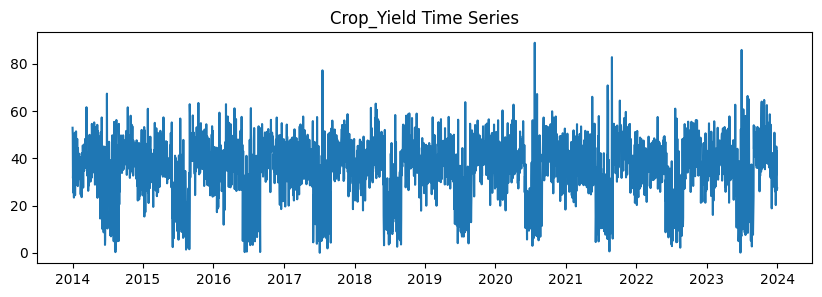

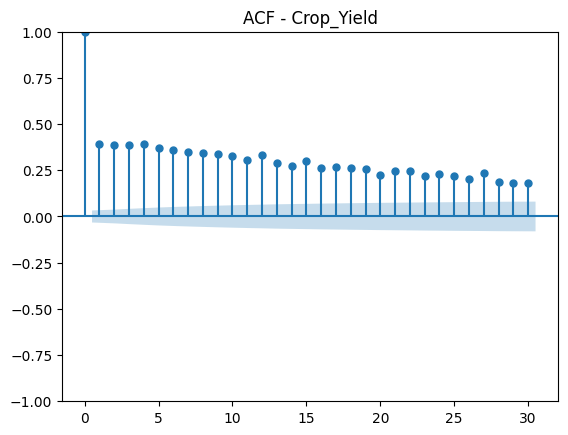

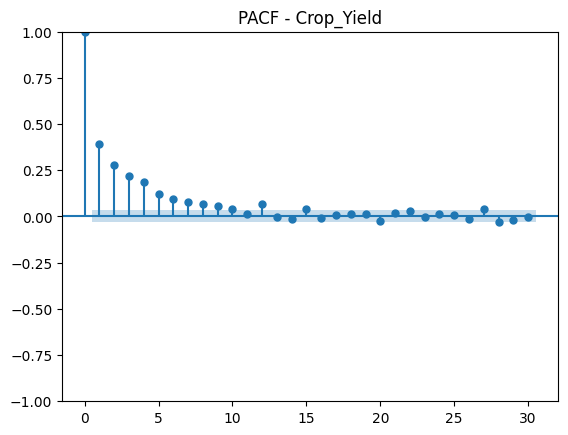

(-7.148107107405437, 3.193310854138872e-10, 14, 3609, {'1%': -3.4321632328202996, '5%': -2.862341184885642, '10%': -2.567196483328331}, 26779.234862747773)
ADF Statistic: -7.1481
ADF p-value: 0.0000
Likely Stationary

(0.043423677627070334, 0.1, 35, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS Statistic: 0.0434
KPSS p-value: 0.1000
Likely Stationary


/tmp/ipykernel_48/3399664792.py:30: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna(), nlags="auto")


In [18]:
test_stationarity(df['Crop_Yield'].dropna(), 'Crop_Yield')

In [19]:
train_size = int(len(df['Crop_Yield']) * 0.9)
train, test = df['Crop_Yield'].iloc[:train_size], df['Crop_Yield'].iloc[train_size:]

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [22]:
model=SARIMAX(train, order=(1,0,1))

In [23]:
results=model.fit()

In [25]:
forecast = results.forecast(steps=20)

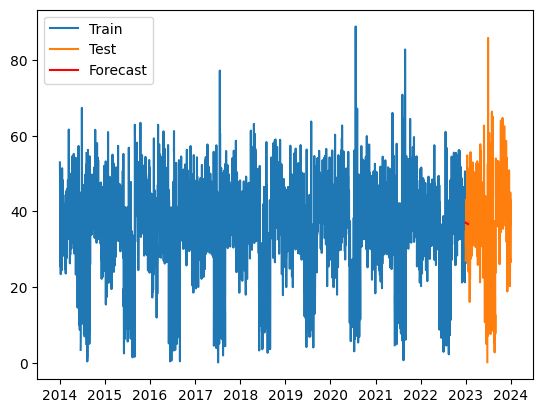

In [26]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()

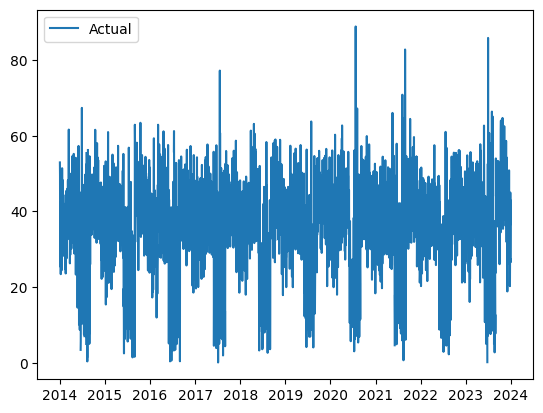

In [27]:
plt.plot(df['Crop_Yield'], label='Actual')
plt.legend()
plt.show()

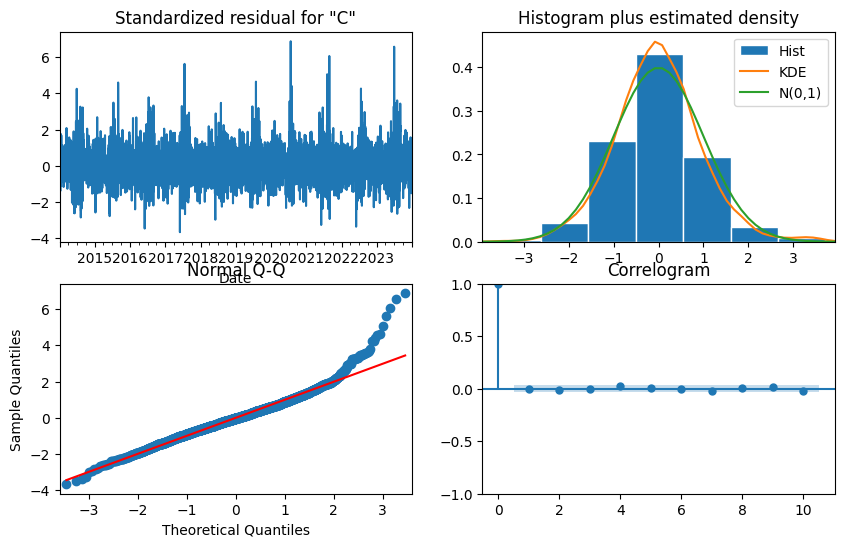

In [29]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Crop_Yield'], order=(1,1,1))
result = model.fit()
result.plot_diagnostics(figsize=(10,6))
plt.show()

In [30]:

from prophet import Prophet

In [32]:
df2=df.copy(deep=True)

In [33]:
df2=df2.reset_index()
df2

,Date,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,6.250000,17.832341,79.992489,7.649061,61.285714,50.142857,40.142857,52.962570,41.714286
1,2014-01-02,6.928571,17.403738,79.997477,9.731096,67.285714,54.500000,43.785714,49.481053,31.964286
2,2014-01-03,6.250000,17.710699,78.611669,12.161914,60.785714,49.571429,40.142857,31.582386,40.601190
3,2014-01-04,7.125000,17.068594,79.349411,9.476664,69.375000,56.000000,44.937500,35.247034,38.703125
4,2014-01-05,6.375000,15.439732,80.000000,10.793227,68.062500,54.562500,43.125000,32.578187,48.994792
...,...,...,...,...,...,...,...,...,...,...
3647,2023-12-27,6.406250,18.765488,79.418663,10.391741,63.687500,51.937500,41.125000,45.000561,27.786458
3648,2023-12-28,6.583333,15.818711,79.517023,11.417404,66.000000,54.166667,42.833333,36.566595,41.680556
3649,2023-12-29,6.843750,17.750068,79.094460,9.926405,66.062500,53.687500,42.375000,42.949637,39.281250
3650,2023-12-30,6.555556,15.174002,79.253593,8.844230,64.666667,51.944444,41.388889,26.585890,33.787037


In [35]:
df2=df2.rename(columns={"Date":'ds',"Crop_Yield":'y'})

In [36]:
df2

,ds,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,y,Soil_Quality
0,2014-01-01,6.250000,17.832341,79.992489,7.649061,61.285714,50.142857,40.142857,52.962570,41.714286
1,2014-01-02,6.928571,17.403738,79.997477,9.731096,67.285714,54.500000,43.785714,49.481053,31.964286
2,2014-01-03,6.250000,17.710699,78.611669,12.161914,60.785714,49.571429,40.142857,31.582386,40.601190
3,2014-01-04,7.125000,17.068594,79.349411,9.476664,69.375000,56.000000,44.937500,35.247034,38.703125
4,2014-01-05,6.375000,15.439732,80.000000,10.793227,68.062500,54.562500,43.125000,32.578187,48.994792
...,...,...,...,...,...,...,...,...,...,...
3647,2023-12-27,6.406250,18.765488,79.418663,10.391741,63.687500,51.937500,41.125000,45.000561,27.786458
3648,2023-12-28,6.583333,15.818711,79.517023,11.417404,66.000000,54.166667,42.833333,36.566595,41.680556
3649,2023-12-29,6.843750,17.750068,79.094460,9.926405,66.062500,53.687500,42.375000,42.949637,39.281250
3650,2023-12-30,6.555556,15.174002,79.253593,8.844230,64.666667,51.944444,41.388889,26.585890,33.787037


In [38]:
df.columns

Index(['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K',
       'Crop_Yield', 'Soil_Quality'],
      dtype='object')

In [39]:
df2 = df2.interpolate()

In [40]:
df2.isnull().sum()

ds              0
Soil_pH         0
Temperature     0
Humidity        0
Wind_Speed      0
N               0
P               0
K               0
y               0
Soil_Quality    0
dtype: int64

In [41]:
train_size = int(len(df2) * 0.8)
train = df2.iloc[:train_size]
test = df2.iloc[train_size:]

In [43]:
model=Prophet()

In [44]:
cols=['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Soil_Quality']
for c in cols:
    model.add_regressor(c)

In [45]:
model.fit(train)

13:37:15 - cmdstanpy - INFO - Chain [1] start processing
13:37:16 - cmdstanpy - INFO - Chain [1] done processing


In [46]:

future = model.make_future_dataframe(periods=len(test), freq='D')
future = future.merge(df2[['ds'] + cols], on='ds', how='left')

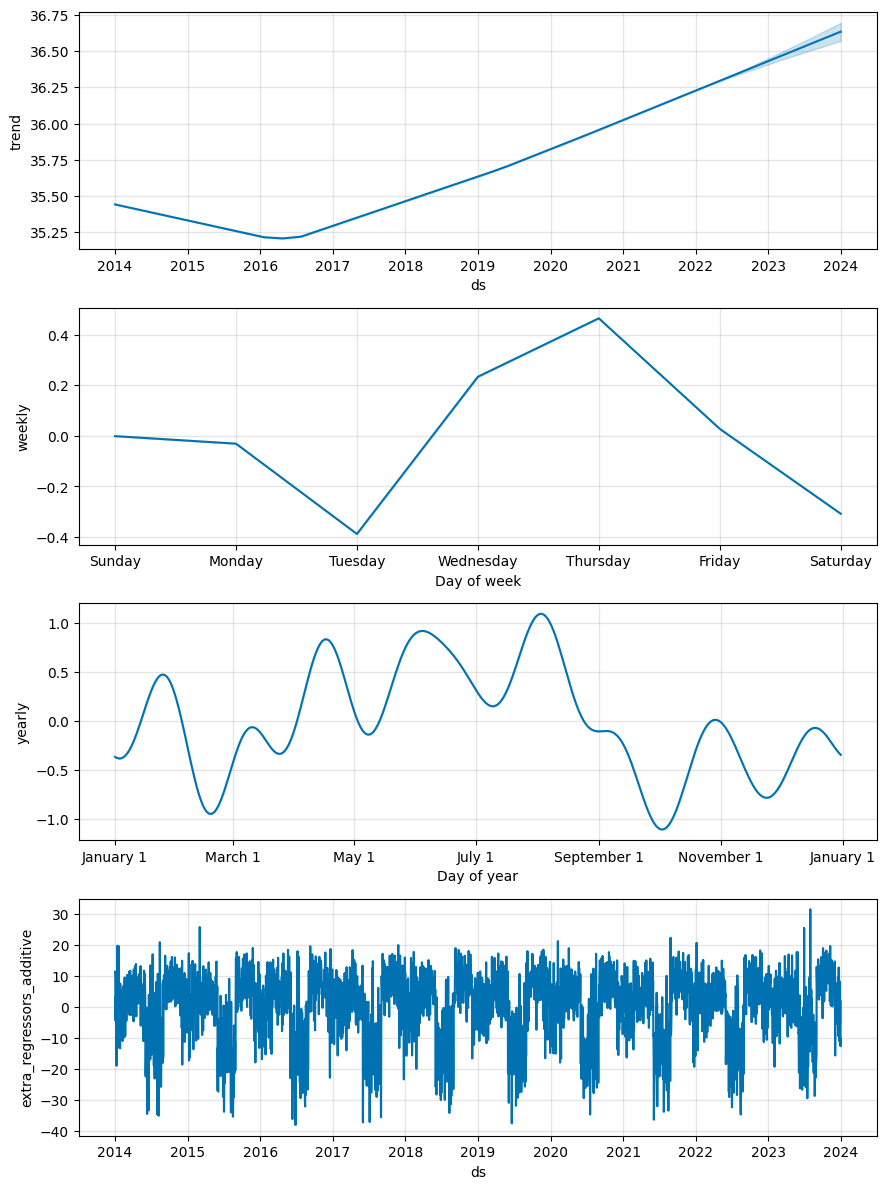

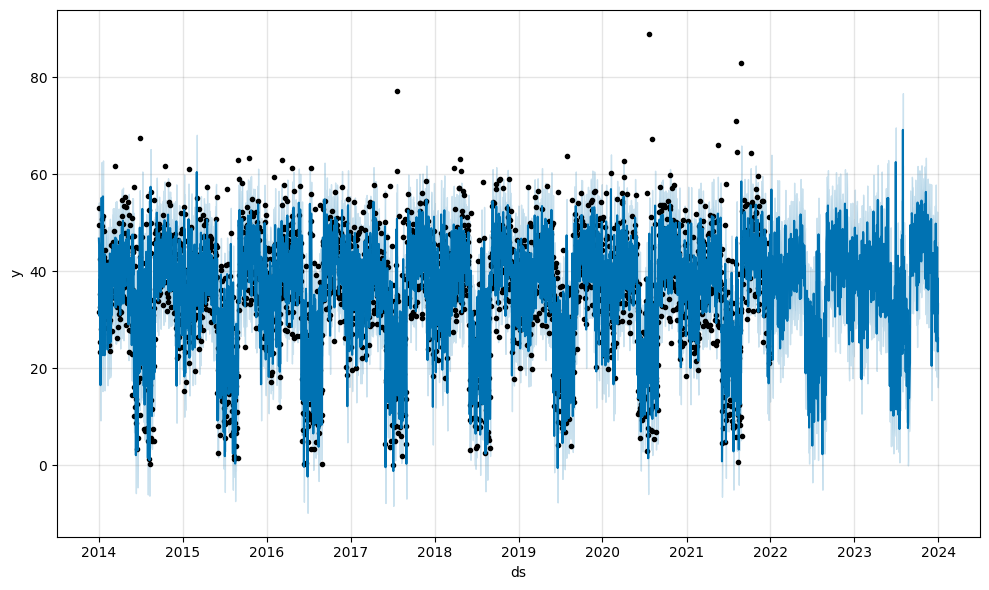

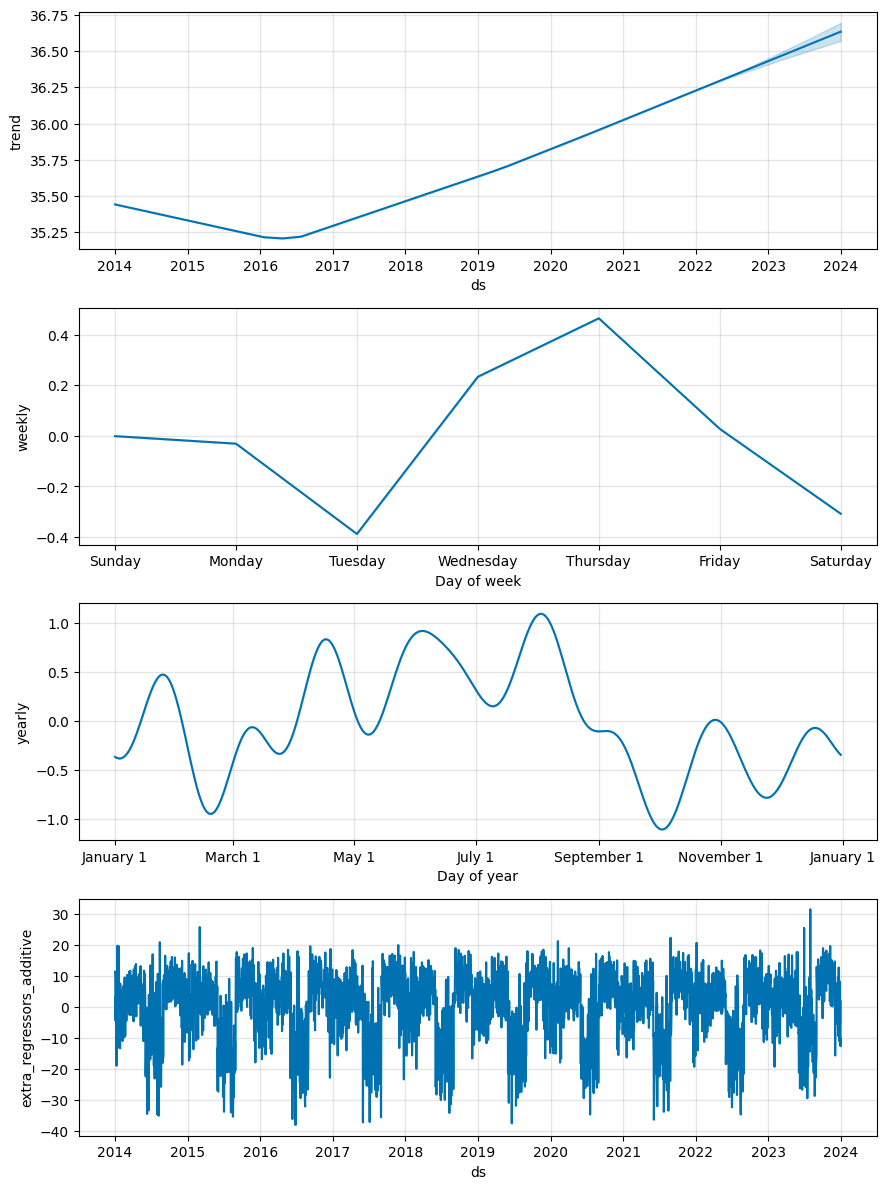

In [48]:
forecast = model.predict(future)
model.plot(forecast)
model.plot_components(forecast)

In [49]:

pred = forecast[['ds', 'yhat']].iloc[train_size:]

In [50]:
df2.isnull().sum()

ds              0
Soil_pH         0
Temperature     0
Humidity        0
Wind_Speed      0
N               0
P               0
K               0
y               0
Soil_Quality    0
dtype: int64

In [52]:
mae = mean_absolute_error(test['y'], pred['yhat'])
rmse = np.sqrt(mean_squared_error(test['y'], pred['yhat']))
r2 = r2_score(test['y'], pred['yhat'])
mape = np.mean(np.abs((test['y'] - pred['yhat']) / test['y'])) * 100
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.6f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 4.73
R2: 0.741403
RMSE: 6.19
MAPE: 34.74%


In [53]:
import joblib
joblib.dump(model,"Prophet.pkl")

['Prophet.pkl']